In [3]:
import pandas as pd

## Obtención de datos

In [4]:
ipc_base_08 = pd.read_csv(
    "./data/IPC/indice-precios-al-consumidor-apertura-por-grupos-base-2008-mensual.csv")
ipc_base_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   indice_tiempo                             85 non-null     object 
 1   ipc_nivel_general                         85 non-null     float64
 2   ipc_estacionales                          85 non-null     float64
 3   ipc_regulados                             85 non-null     float64
 4   ipc_resto                                 85 non-null     float64
 5   precios_relativos_estacionales_ipc_resto  85 non-null     float64
 6   precios_relativos_regulados_ipc_resto     85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [5]:
ipc_base_08_ng = ipc_base_08[["indice_tiempo", "ipc_nivel_general"]].set_index(
    "indice_tiempo").rename(columns={"ipc_nivel_general": "nivel_general"})
ipc_base_08_ng


,nivel_general
indice_tiempo,
2006-12-01,89.16
2007-01-01,90.18
2007-02-01,90.45
2007-03-01,91.14
2007-04-01,91.82
...,...
2013-08-01,160.23
2013-09-01,161.56
2013-10-01,163.00


In [6]:
ipc_base_oct13_sept14 = pd.read_csv(
    "./data/IPC/indice-precios-al-consumidor-nacional-urbano-principales-aperturas-base-oct-13-sep-14-mensual.csv"
)
ipc_base_oct13_sept14_ng = ipc_base_oct13_sept14[["indice_tiempo","nivel_general_indice"]].set_index("indice_tiempo").rename(columns={"nivel_general_indice":"nivel_general"})
ipc_base_oct13_sept14_ng

,nivel_general
indice_tiempo,
2013-12-01,91.534595
2014-01-01,94.874298
2014-02-01,98.116037
2014-03-01,100.663118
2014-04-01,102.462104
2014-05-01,103.931574
2014-06-01,105.276361
2014-07-01,106.781454
2014-08-01,108.206395


In [7]:
ipc_caba_base_jul12 = pd.read_csv("./data/IPC/indice-precios-consumidor-caba-jul-2012-100.csv")

ipc_caba_base_jul12_ng = ipc_caba_base_jul12[["indice_tiempo", "nivel_general"]].set_index("indice_tiempo")
ipc_caba_base_jul12_ng.loc["2015-10-01":"2016-12-01"]

# dateRange = pd.date_range("2015-10-01", "2016-12-01", freq="MS")
# ipc_caba_base_jul12_ng_missing = ipc_caba_base_jul12_ng.loc[]
# ipc_caba_base_jul12_ng_missing


,nivel_general
indice_tiempo,
2015-10-01,256.42
2015-11-01,261.43
2015-12-01,271.67
2016-01-01,282.91
2016-02-01,294.14
2016-03-01,303.90
2016-04-01,323.79
2016-05-01,340.09
2016-06-01,351.05


In [8]:
ipc_base_dic16 = pd.read_csv(
    "./data/IPC/indice-precios-al-consumidor-apertura-por-categorias-base-diciembre-2016-mensual.csv")

ipc_base_dic16_ng = ipc_base_dic16[[
    "indice_tiempo", "ipc_nivel_general_nacional"]].set_index(
        "indice_tiempo"
).rename(
    columns={
        "ipc_nivel_general_nacional": "nivel_general"
    }
)
ipc_base_dic16_ng


,nivel_general
indice_tiempo,
2016-12-01,100.0000
2017-01-01,101.5859
2017-02-01,103.6859
2017-03-01,106.1476
2017-04-01,108.9667
...,...
2021-08-01,510.3942
2021-09-01,528.4968
2021-10-01,547.0802


## Homologación de datos 2006 -> 2015

1. Se encuentra el coeficiente de la base octubre 2013 a septiembre 2014 con la base 2008 

In [9]:
base_08 = ipc_base_08_ng.loc["2013-12-01"].at["nivel_general"]
print(f"base 2008:        {base_08}")
base_oct13_sept14 = ipc_base_oct13_sept14_ng.loc["2013-12-01"].at["nivel_general"]
print(f"base oct14-sept15 {base_oct13_sept14}")
ce_08_to_oct13sept14 = base_oct13_sept14/base_08
print(ce_08_to_oct13sept14)

base 2008:        166.84
base oct14-sept15 91.53459452711807
0.5486369846986219


2. Se multiplica el coeficiente de homologación por cada IPC nivel general con base 2008

In [13]:
ipc_h_08_boct13sept14_ng = ipc_base_08_ng.apply(lambda x: x*ce_08_to_oct13sept14)
"""
IPC con base 2008 Homologado con base oct 13 - sept 14
"""
ipc_h_08_boct13sept14_ng

,nivel_general
indice_tiempo,
2006-12-01,48.916474
2007-01-01,49.476083
2007-02-01,49.624215
2007-03-01,50.002775
2007-04-01,50.375848
...,...
2013-08-01,87.908104
2013-09-01,88.637791
2013-10-01,89.427829


3. Se concatenan ambas bases de datos, homologadas con base octubre 13 septiembre 14

In [45]:
ipc_06_to_15_base_oct13sept14 = pd.concat(
    [ipc_h_08_boct13sept14_ng, ipc_base_oct13_sept14_ng], axis=0).drop_duplicates()
"""
IPC del 2006 al 2015 con base en octubre 13 - septiembre 14
"""
ipc_06_to_15_base_oct13sept14.to_csv("./data/IPC_H/ipc_2006_2015_base_oct13_sept14.csv")


<AxesSubplot:xlabel='indice_tiempo'>

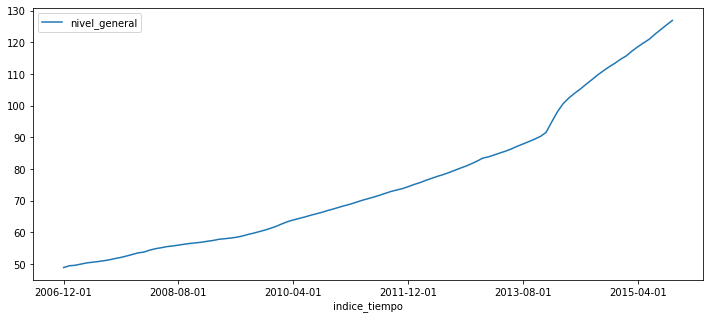

In [43]:
ipc_06_to_15_base_oct13sept14.plot(figsize=(12,5))

<AxesSubplot:xlabel='indice_tiempo'>

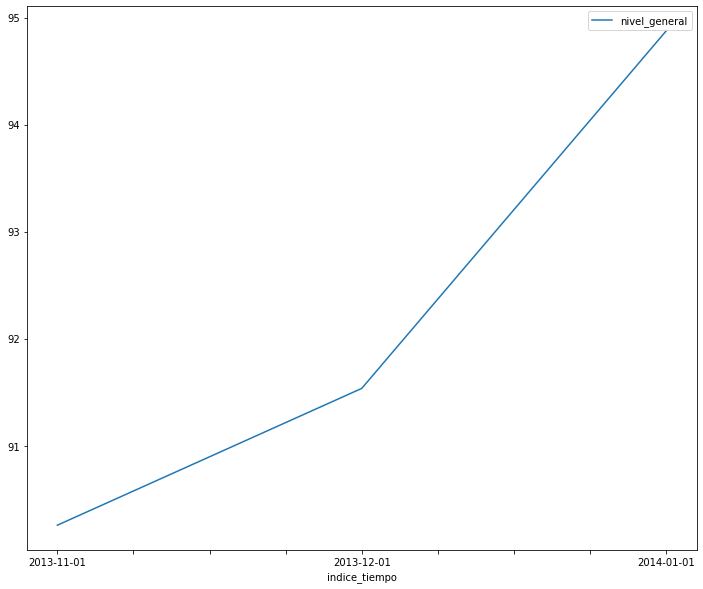

In [44]:
ipc_06_to_15_base_oct13sept14.loc["2013-11-01":"2014-01-01"].plot(figsize=(12,10))

## Hmologación enero 2006 -> diciembre 2016

In [30]:
ipc_06_to_15_base_oct13sept14.tail(1)

,nivel_general
indice_tiempo,
2015-10-01,126.88


In [28]:
ipc_caba_base_jul12_ng.loc["2015-10-01"]

nivel_general    256.42
Name: 2015-10-01, dtype: float64